(sec-law-large-numbers)=
# Stima dei parametri

## Parametri e statistiche

In statistica, per *popolazione* si intende un insieme di elementi che presenta caratteristiche aleatorie, mentre per *campione* si intende un sottoinsieme della popolazione. Ma a cosa corrisponde in pratica la popolazione? Per uno psicologo la popolazione è un gruppo di individui. Per un biologo marino la popolazione è un gruppo di delfini, ad esempio. Nella maggior parte dei casi, le popolazioni oggetto di interesse per i ricercatori sono insiemi di entità concrete che esistono nel mondo reale. Dal punto di vista della statistica, invece, le popolazioni sono delle entità astratte. Infatti, gli statistici operazionalizzano il concetto di "popolazione" nei termini di un oggetto matematico che consente di essere manipolato con facilità. In precedenza noi abbiamo già incontrato questi oggetti matematici: sono le distribuzioni di probabilità.

L'idea è semplice. Supponiamo di occuparci del quoziente di intelligenza, QI. Abbiamo detto che, per uno psicologo, la popolazione di interesse solitamente è un gruppo di individui, ciascuno dei quali è dotato di uno specifico punteggio del QI. Uno statistico "semplifica" tale situazione definendo in maniera operativa la popolazione come la distribuzione di densità rappresentata nella figura seguente. In precedenza abbiamo visto infatti come una distribuzione di densità non sia altro che la descrizione matematica della "forma" di un istogramma che rappresenta un numero molto alto di osservazioni.

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats
import math
from scipy.constants import golden

In [17]:
%matplotlib inline
sns.set_theme(
    context="paper",
    style="darkgrid",
    palette="colorblind",
    rc={"figure.figsize": (5.0, 5.0 / golden)},
)

SEED = 12345
rng = np.random.default_rng(SEED)

Text(0.5, 1.0, '100 campioni')

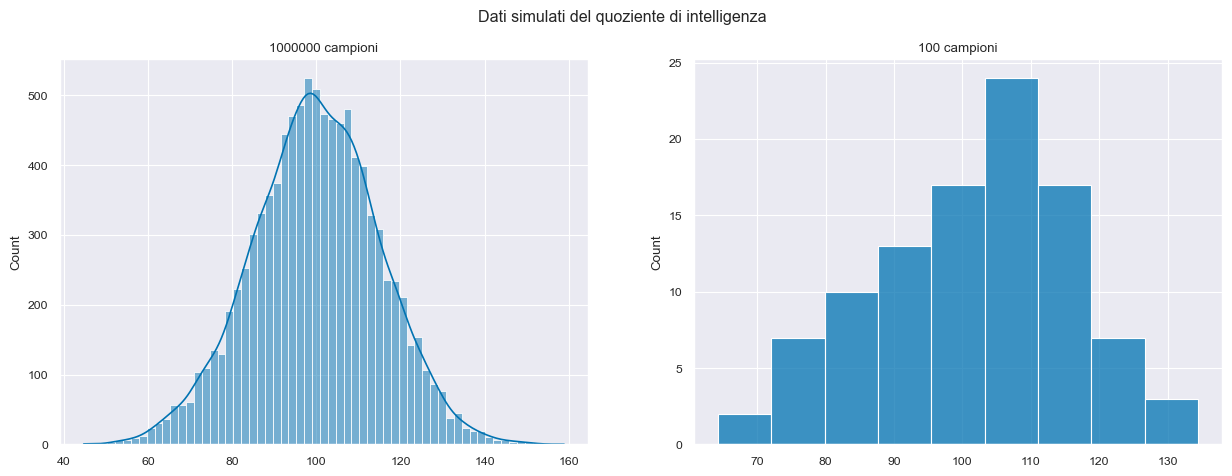

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
fig.suptitle("Dati simulati del quoziente di intelligenza")

IQ = np.random.normal(loc=100, scale=15, size=10000)
sns.histplot(IQ, kde=True, ax=axes[0])
axes[0].set_title("1000000 campioni")

IQ = np.random.normal(loc=100, scale=15, size=100)
sns.histplot(IQ, ax=axes[1])
axes[1].set_title("100 campioni")


I test di intelligenza sono progettati in modo che il QI medio sia pari a 100, la deviazione standard dei punteggi QI sia uguale a 15 e la distribuzione dei punteggi del QI sia normale. I valori riportati sopra sono detti *parametri* in quanto descrivono le proprietà dell'intera popolazione. Cioè, diciamo che la media della popolazione è $\mu = 100$ e la deviazione standard della popolazione è $\sigma = 15$. Dal punto di vista statistico, dunque, possiamo rappresentare questa ipotetica popolazione di valori del QI mediante l'oggetto matematico che corrisponde a una particolare distribuzione Normale:

$$
QI \sim \mathcal{N}(\mu = 100, \sigma = 15).
$$ 

Supponiamo ora di eseguire un esperimento nel quale il test di intelligenza viene somministrato a 20 persone selezionate a caso. Tale campione casuale semplice consiste nel seguente insieme di 20 numeri:

In [19]:
size = 20
x = np.random.normal(loc=100, scale=15, size=size)
print(*x.round())

82.0 127.0 108.0 88.0 128.0 84.0 100.0 97.0 103.0 80.0 102.0 96.0 100.0 89.0 113.0 87.0 105.0 63.0 115.0 110.0


Se costruiamo un istogramma con i dati di un tale campione, l'istogramma ha approssimativamente la forma di una Normale, ma è un'approssimazione molto cruda della distribuzione della popolazione mostrata nella funzione di densità $\mathcal{N}(100, 15)$. Se calcoliamo la media del campione, otteniamo un numero abbastanza vicino alla media della popolazione di 100, ma non identico: nel campione considerato la media e la deviazione standard sono uguali a:

In [20]:
xbar = np.mean(x)
print(xbar)

98.85223135903938


In [21]:
x_std = np.std(x)
print(x_std)

15.52396375788055


Queste *statistiche campionarie* descrivono le proprietà di uno specifico campione che è stato osservato e, sebbene siano abbastanza simili ai parametri della popolazione, non sono uguali ad essi. In generale, le statistiche campionarie sono ciò che è possibile calcolare a partire dai dati osservati sul campione mentre i parametri della popolazione sono ciò che vorremmo conoscere.

## Teorema di Bernoulli

I risultati precedenti sono incoraggianti: la media campionaria fornisce un'approssimazione ragionevole della media della popolazione $\mu = 100$. In molti studi un tale livello di precisione è accettabile, ma in altre situazioni è necessario essere più precisi.

Cosa dobbiamo fare se vogliamo che le statistiche campionarie siano più vicine ai parametri della popolazione? La risposta è ovvia: dobbiamo raccogliere più dati. Supponiamo dunque di condurre un nuovo esperimento nel quale misuriamo il QI di 10000 persone. 

In [22]:
size = 10000
x = np.random.normal(loc=100, scale=15, size=size)

In [23]:
xbar = np.mean(x)
print(xbar)

99.9066653848723


In [24]:
x_std = np.std(x)
print(x_std)

14.985261643970983


È chiaro che, in questo secondo caso, otteniamo un'approssimazione migliore rispetto al precedente campione più piccolo. Questi valori sono molto vicini ai parametri della popolazione.

Il messaggio, un po' banale, che ricaviamo a questa simulazione è che, generalmente, i campioni di dimensioni maggiori forniscono informazioni migliori. Ho chiamato "banali" i risultati di questa simulazione perché dovrebbe essere evidente a tutti che le cose stanno così. Infatti, questo punto è talmente ovvio che, quando Jacob Bernoulli -- uno dei fondatori della teoria della probabilità -- formalizzò questa idea nel 1713, commentò il risultato nel modo seguente:

> Perché anche il più stupido degli uomini, basandosi soltanto sul suo istinto, da solo e senza alcuna istruzione (il che è notevole), è convinto che maggiore è il numero di osservazioni, minore è il pericolo di sbagliare.

In statistica questa intuizione va sotto il nome di *Legge dei grandi numeri*. La Legge dei grandi numeri ci dice che la media aritmetica di un campione di $n$ osservazioni.

In termini tecnici: la media di $n$ variabili aleatorie $X_i$ indipendenti e identicamente distribuite, ovvero $\frac{1}{n}\sum_{i=1}^nX_i$, per $n$ crescente tende o converge al valore atteso teorico $\mu$.

La Legge dei grandi numeri è uno degli strumenti più importanti della statistica.

```{Admonition} Nota
Si noti che la Legge dei grandi numeri non può dirci se lo strumento o l'esperimento considerati stiano producendo dei dati utili o dei dati che è sensato riassumere tramite la media. Ad esempio, se il dispositivo di misurazione è difettoso, la media di molte misurazioni sarà una stima molto accurata della cosa sbagliata! Questo è un esempio di errore sistematico, o errore di campionamento, che sono qualcosa di molto diverso dal fenomeno di fluttuazione casuale che viene descritto dalla Legge dei grandi numeri.
```

## Distribuzione delle medie campionarie

Abbandoniamo l'idea di ottenere un campione di 10,000 persone, perché non è pratico. Chiediamoci invece quale relazione ci sia tra le statistiche del campione e i parametri della popolazione, nel caso di campioni di piccole dimensioni. Per esempio, consideriamo un campione di ampiezza 5.

In [28]:
IQ_1 = np.random.normal(loc=100,scale=15,size=5).astype(int)
print("Dati simulati: ", IQ_1)
print("Media dei dati simulati: ", np.mean(IQ_1))


Dati simulati:  [121  99 123 107 110]
Media dei dati simulati:  112.0


In un secondo campione verranno ottenuti, ovviamente, valori diversi. Ripetiamo la simulazione 5 volte, considerando sempre un campione casuale di 5 osservazioni.

In [30]:
df = pd.DataFrame(
    {'IQ1': np.random.normal(loc=100,scale=15,size=5).astype(int),
     'IQ2': np.random.normal(loc=100,scale=15,size=5).astype(int),
     'IQ3': np.random.normal(loc=100,scale=15,size=5).astype(int),
     'IQ4': np.random.normal(loc=100,scale=15,size=5).astype(int),
     'IQ5': np.random.normal(loc=100,scale=15,size=5).astype(int)
    }) 

df.describe()

,IQ1,IQ2,IQ3,IQ4,IQ5
count,5.000000,5.000000,5.000000,5.000000,5.00000
mean,97.200000,110.000000,93.200000,91.800000,101.80000
std,12.357184,12.369317,7.463243,17.991665,6.83374
min,76.000000,94.000000,82.000000,71.000000,91.00000
25%,97.000000,103.000000,92.000000,83.000000,101.00000
50%,102.000000,109.000000,92.000000,84.000000,102.00000
75%,105.000000,119.000000,99.000000,107.000000,106.00000
max,106.000000,125.000000,101.000000,114.000000,109.00000


Continuiamo così per 10,000 repliche e poi disegniamo un istogramma. Facendo così otteniamo un'approssimazione di quella che, in statistica, viene chiamata la *distribuzione delle medie campionarie*. La figura seguente mostra l'istogramma dei valori delle medie dei 10,000 campioni casuali di ampiezza 5 estratti dalla popolazione dei QI, insieme alla funzione di densità che rappresenta la popolazione del QI.

<AxesSubplot: >

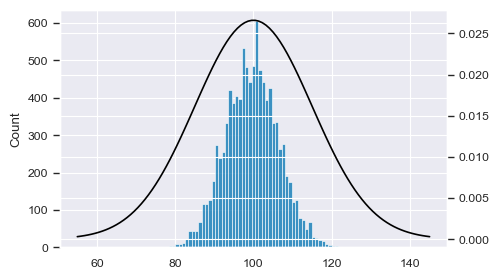

In [35]:
# define a normal distribution with a mean of 100 and a standard deviation of 15
mu = 100
sigma = 15
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and calculate the sample 
# mean for each experiment
sample_means = []
for i in range(1,10000):
    sample_mean = np.mean(np.random.normal(loc=100,scale=15,size=5).astype(int))
    sample_means.append(sample_mean)

# plot a histogram of the distribution of sample means, together with the 
# population distribution
fig, ax = plt.subplots()
sns.histplot(sample_means, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=x,y=y, ax=ax2, color='black')

Si notino due aspetti importanti:

- la media della distribuzione delle medie campionarie è uguale alla media della popolazione,
- la varianza della distribuzione delle medie campionarie è minore della varianza della popolazione.

Questi due risultati che abbiamo ottenuto empiricamente possono essere espressi in maniera formale nel modo seguente.

La media di campioni casuali estratti con ripetizione da una popolazione finita (oppure da una popolazione infinita) di media $\mu$ e varianza $\sigma^2$  si può esprimere come $\bar{X}_n = S_n/n$, dove $S_n = X_1 + X_2 + \dots + X_n$ è la somma di $n$ v.c. indipendenti che hanno la medesima densità di probabilità. In tali circostanze, la variabile casuale "media campionaria" avrà valore atteso

$$
\mathbb{E}(\bar{X}_n) = \frac{1}{n} \mathbb{E}(S_n) = \frac{1}{n} n \mu = \mu.
$$

e varianza

$$
\mathbb{V}(\bar{X}_n) = \frac{1}{n^2} \mathbb{V}(S_n) = \frac{1}{n^2} n \sigma^2 
= \frac{\sigma^2}{n}.
$$

Si noti che la derivazione della varianza (ma non del valore atteso) richiede che venga soddisfatta la condizione dell'indipendenza; in altre parole, questi risultati valgono solo per campioni casuali indipendenti.

## Distribuzioni campionarie di altre statistiche

Ovviamente è possibile costruire la distribuzione campionaria di altre statistiche campionarie.  Ad esempio, la figura seguente mostra l'approssimazione empirica della distribuzione campionaria del valore massimo del campione. È chiaro che, se da ciascun campione estraiamo il valore massimo, il valore atteso della distribuzione campionaria di questa statistica sarà maggiore della media della popolazione.

<AxesSubplot: >

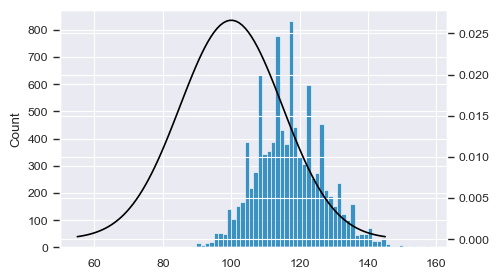

In [37]:
# define a normal distribution with a mean of 100 and a standard deviation of 15
mu = 100
sigma = 15
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and find the maximum score for each experiment
sample_maxes = []
for i in range(1, 10000):
    sample_max = max(np.random.normal(loc=100, scale=15, size=5).astype(int))
    sample_maxes.append(sample_max)

# plot a histogram of the distribution of sample maximums, together with the population distribution
fig, ax = plt.subplots()
sns.histplot(sample_maxes, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=x, y=y, ax=ax2, color="black")


La distribuzione campionaria della varianza dei campioni è particolarmente interessante. Usiamo la formula della statistica descrittiva, ovvero

$$
S^2 = \frac{\sum_{i=1}^n (Y_i - \bar{Y})^2}{n}.
$$

Dato che abbiamo capito qual è la procedura, creiamo un grafico con l'approssimazione empirica della distribuzione campionaria della varianza dei punteggi del quoziente di intelligenza. Sappiamo che la varianza della popolazione è uguale a $15^2$. Ma la simulazione rivela un risultato interessante: se usiamo la formula precedente per stimare la varianza della popolazione, in media, otteniamo un risultato troppo piccolo. Infatti, la formula precedente fornisce una stima distorta del parametro della popolazione. Gli statistici chiamano *distorsione* il fatto per cui il valore atteso di uno stimatore non coincide con il parametro. 

181.92034444359487

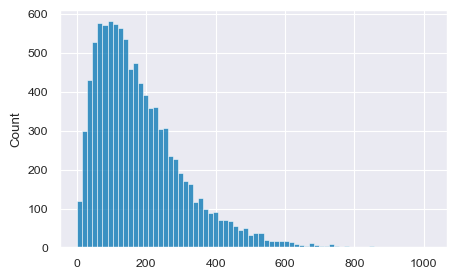

In [71]:
# define a normal distribution with a mean of 100 and a standard 
# deviation of 15
mu = 100
sigma = 15
x = np.linspace(0, 30)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and find 
# the variance score for each experiment
sample_vars = []
for i in range(1,10000):
    sample_var = np.var(np.random.normal(loc=100,scale=15,size=5))
    sample_vars.append(sample_var)

# plot a histogram of the distribution of sample variance
fig, ax = plt.subplots()
sns.histplot(sample_vars, ax=ax)

np.mean(sample_vars)

Abbiamo già visto come questo problema trova una semplice soluzione nel momento in cui usiamo $n-1$ al denominatore.

224.3106844223157

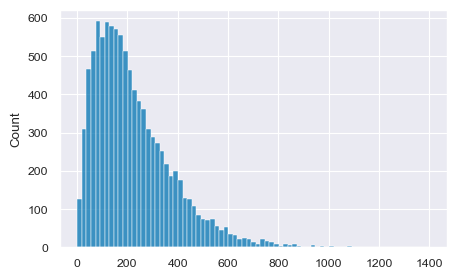

In [72]:
# define a normal distribution with a mean of 100 and a standard 
# deviation of 15
mu = 100
sigma = 15
x = np.linspace(0, 30)
y = stats.norm.pdf(x, mu, sigma)

# run 10000 simulated experiments with 5 subjects each, and find 
# the variance score for each experiment
sample_vars = []
for i in range(1,10000):
    sample_var = np.var(np.random.normal(loc=100,scale=15,size=5), ddof=1)
    sample_vars.append(sample_var)

# plot a histogram of the distribution of sample variance
fig, ax = plt.subplots()
sns.histplot(sample_vars, ax=ax)

np.mean(sample_vars)

## Teorema del limite centrale

Laplace dimostrò il teorema del limite centrale (TLC) nel 1812. Il TLC dice che se prendiamo una sequenza di variabili casuali indipendenti e le sommiamo, tale somma tende a distribuirsi come una Normale. Inoltre, il TLC specifica, sulla base dei valori attesi e delle varianze delle v.c. che vengono sommate, quali sono i parametri della distribuzione Normale così ottenuta.

```{admonition} Teorema
Si supponga che $Y = Y_1, \dots, Y_i, \ldots, Y_n$ sia una sequenza di v.a. i.i.d. con $\mathbb{E}(Y_i) = \mu$ e $SD(Y_i) = \sigma$. Si definisca una nuova v.c. come:

$$
Z = \frac{1}{n} \sum_{i=1}^n Y_i.
$$

Con $n \rightarrow \infty$, $Z$ tenderà ad una Normale con lo stesso valore atteso di $Y_i$ e una deviazione standard che sarà più piccola della deviazione standard originaria di un fattore pari a $\frac{1}{\sqrt{n}}$:

$$
p_Z(z) \rightarrow \mathcal{N}\left(z \ \Bigg| \ \mu, \, \frac{1}{\sqrt{n}} \cdot \sigma \right).
$$
```

Il TLC può essere generalizzato a variabili che non hanno la stessa distribuzione purché siano indipendenti e abbiano aspettative e varianze finite. Molti fenomeni naturali, come l'altezza dell'uomo adulto di entrambi i generi, sono il risultato di una serie di effetti additivi relativamente piccoli, la cui combinazione porta alla normalità, indipendentemente da come gli effetti additivi sono distribuiti. Questo è il motivo per cui la distribuzione normale forniscre una buona rappresentazione della distribuzione di molti fenomeni naturali.

Possiamo usare una simulazione per illutrare il TLC. Consideriamo una popolazione di partenza fortemente asimmetrica, ovvero una Beta(2, 1). Da essa estraiamo 50,000 campioni di ampiezza $n$ e costruiamo la distribuzione campionaria di tali campioni.

In [80]:
# parameters of the beta
a=2
b=1

def plotSamples(n):
    # create normal distribution with mean and standard deviation of the beta
    mu = a / (a+b)
    sigma = math.sqrt( a*b / (a+b)**2 / (a+b+1) )
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma/math.sqrt(n))

    # find sample means from samples of "ramped" beta distribution
    values = []
    for i in range(n):
        v = []
        for j in range(50000):
          v.append(np.random.beta(a,b))
        values.append(v)
    df = pd.DataFrame(values)
    sample_means = df.mean(axis=0)

    # plot a histogram of the distribution of sample means, together 
    # with the population distribution
    fig, ax = plt.subplots(sharex=True)
    sns.histplot(sample_means)
    ax2 = ax.twinx()
    sns.lineplot(x=x,y=y, ax=ax2, color='black')
    ax.set(yticklabels=[])
    ax2.set(yticklabels=[])
    ax.set(ylabel=None)
    ax2.set(ylabel=None)
    ax.tick_params(left=False)
    ax2.tick_params(right=False)
    ax.set_title("Ampiezza campionaria = " + str(n))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)


Se l'ampiezza campionaria è 1, allora la ditribuzione campionaria delle medie coincide con la popolazione.

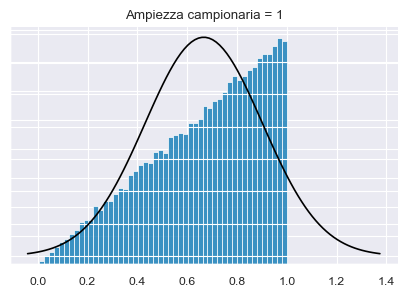

In [81]:
plotSamples(1)

Con $n$ = 2, la distribuzione delle medie dei campioni non è certamente Normale, inizia ad avvicinarsi alla gaussianità.

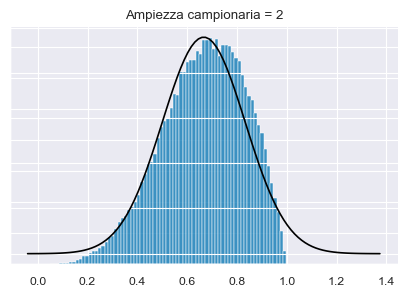

In [82]:
plotSamples(2)

Con $n$ = 4 c'è ancora una grande differenza tra la distribuzione campionaria delle medie dei campioni e la distribuzione normale, ma l'approssimazione migliora.

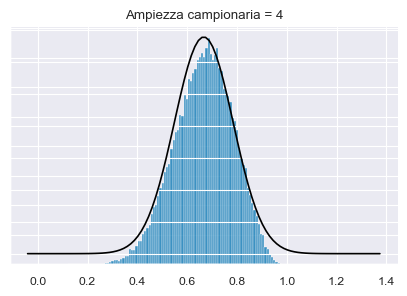

In [83]:
plotSamples(4)

Con $n$ = 4 direi che una funzione $\mathcal{N}(100, 15/\sqrt{50})$ fornisce una buona approssimazione alla distribuzione campionaria delle medie dei campioni.

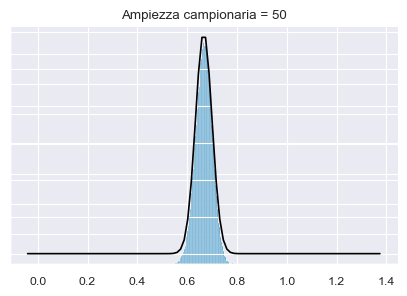

In [84]:
plotSamples(50)

In altre parole, a meno che la dimensione $n$ del campione non sia minuscola, la distribuzione campionaria della media dei campioni viene ben approssimata dalla Normale, indipendentemente dalla forma della distribuzione della popolazione. Per campioni sufficientemente grandi, dunque, il TLC ci dice quale sarà la forma della distribuzione campionaria della media dei campioni, anche quando non sappiamo nulla della popolazione di media $\mu$ e deviazione standard $\sigma$: $\bar{X} \sim \mathcal{N}(\mu, \sigma/\sqrt{n})$.

Questo risultato è utile in tantissimi contesti. Ci dice perché i risultati di esperimenti con $n$ grande sono più affidabili di quelli in cui $n$ è piccolo e, poiché ci fornisce una formula esplicita per l'errore standard ($\sigma/\sqrt{n}$), ci consente di valutare l'affidabilà relativa degli esperimenti al variare di $n$. Negli esperimenti psicologici, molte delle cose che vogliamo misurare sono in realtà medie di molte quantità diverse (ad esempio, l'intelligenza "generale" misurata dal QI è una media di un gran numero di abilità e abilità "specifiche"), e quando ciò accade, la quantità media seguirà una distribuzione normale. A causa di questa legge matematica, la distribuzione normale viene osservata spesso nei dati degli esperimenti psicologici (e non solo).

## Stima dei parametri della popolazione

I parametri della popolazione, in generale, sono sconosciuti. Ma possono essere stimati usando le informazioni del campione. La tabella seguente mostra i simboli che vengono usati e ci ricorda quello che sappiamo e quello che non sappiamo.

|Simbolo          | Nome           | È qualcosa che conosciamo?     |
|:----------------|:-------------|:--------------------|
|$s$              |Deviazione standard del campione    |Sì, la calcoliamo dai dati grezzi |
|$\sigma$         |Deviazione standard della popolazione  | No, tranne in casi particolari o nelle simulazioni  |
|$\hat{\sigma}$  | Stima della deviazione standard della popolazione | Sì, ma non è uguale a $\sigma$ |
|$s^2$            | Varianza del campione    |Sì, la calcoliamo dai dati grezzi |
|$\sigma^2$       | Varianza della popolazione  | No, tranne in casi particolari o nelle simulazioni  |
|$\hat{\sigma}^2$ | Stima della varianza della popolazione  | Sì, ma non è uguale a $\sigma^2$  |


Utilizzando le informazioni di un campione casuale di ampiezza $n$

-  la stima migliore che possiamo ottenere della media $\mu$ della popolazione è data dalla media $\bar{Y}$ del campione;
-  la stima migliore che possiamo ottenere della varianza $\sigma^2$ della popolazione è data da

$$
\hat{\sigma}^2 = \frac{1}{n-1} \sum_{i=1}^n (Y_i - \bar{Y})^2.
$$

## Watermark

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w